## I'm looking forward to your high evaluation!
## If you have any suggestions for improvement, please comment!
The Dataset is "World's Air Quality and Water Pollution".

This dataset is **3963 rows 5 columns**.

# Features

|Feature|Example|D-type|Null-Count|
|----|----|----|----|
|City|New York City|object|0|
|Region|"New York"|object|0|
|Country|"United States of America"|object|0|
|AirQuality|46.816038|float64|0|
|WaterPollution|49.504950|float64|0|

## Caution
**Air Quality Column**: Air quality varies from 0 (bad quality) to 100 (top good quality)

**Water Pollution Column**: Water pollution varies from 0 (no pollution) to 100 (extreme pollution).

In [1]:
# Libraries required for visualization and data processing

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


# to display all columns
pd.set_option("display.max_columns",None)

# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/worlds-air-quality-and-water-pollution-dataset/cities_air_quality_water_pollution.18-10-2021 (1).csv")
df.columns = ["City", "Region", "Country", "AirQuality", "WaterPollution"]
print(df.shape)
df.head(3)

(3963, 5)


,City,Region,Country,AirQuality,WaterPollution
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000


# Data detail

In [3]:
df.describe()

,AirQuality,WaterPollution
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3963 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [5]:
df["Region"] = df["Region"].str.replace('"', '')
df["Country"] = df["Country"].str.replace('"', '')

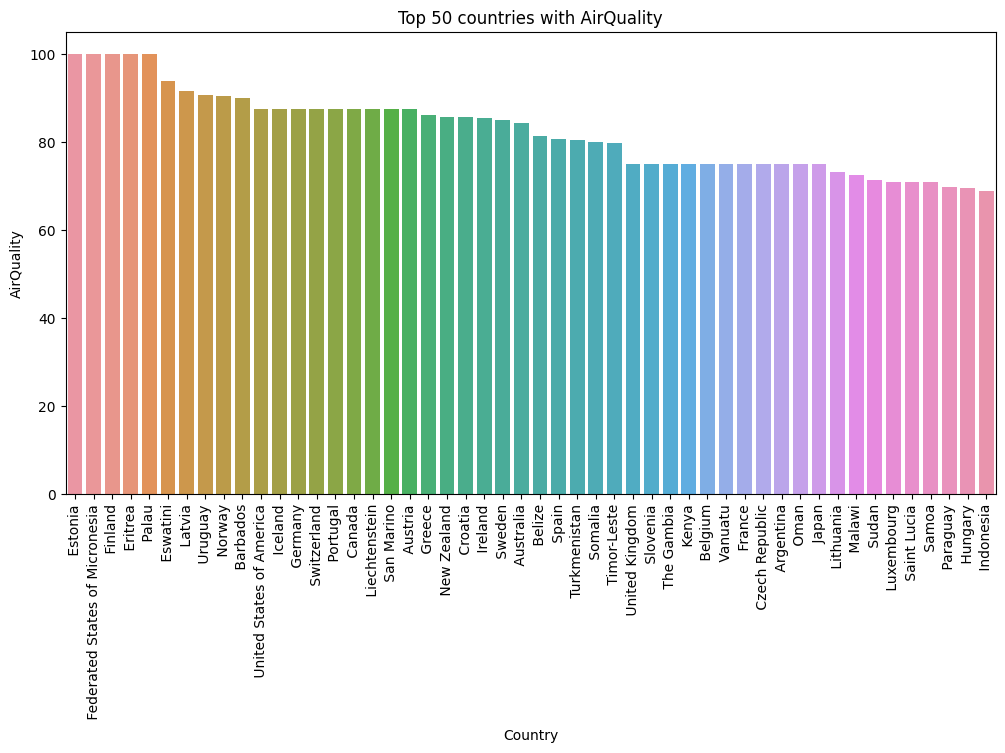

In [6]:
plt.figure(figsize=(12,6))
tmp_df = df.groupby("Country").agg({"AirQuality":"median"}).sort_values("AirQuality",ascending=False)[:50]
sns.barplot(x=tmp_df.index,y=tmp_df["AirQuality"])
plt.xticks(rotation=90)
plt.title("Top 50 countries with AirQuality")
plt.show()

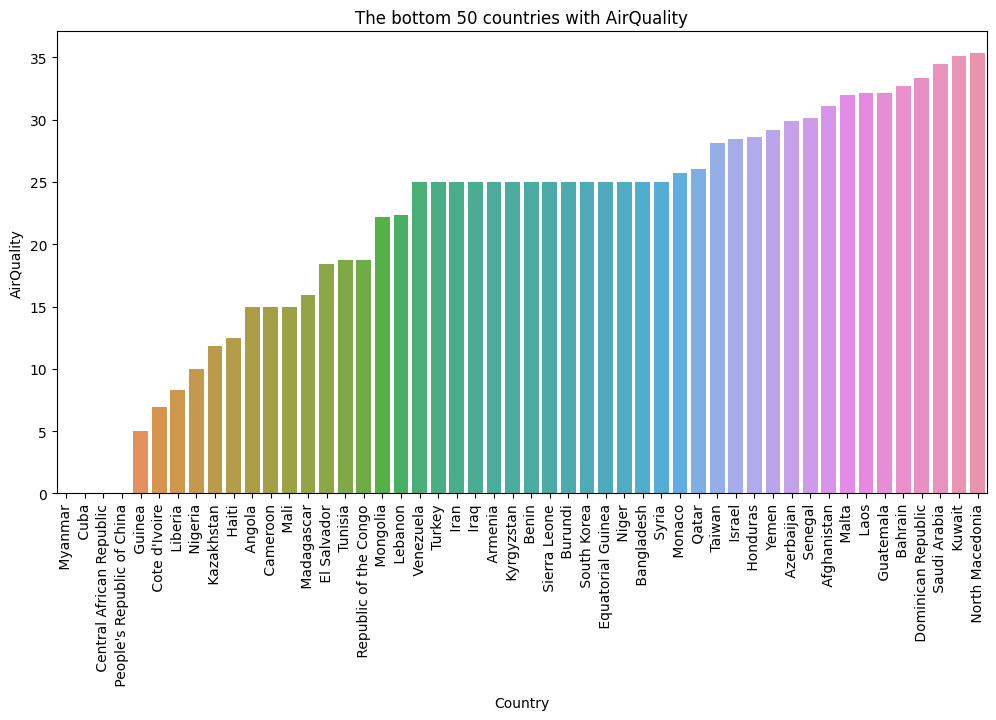

In [7]:
plt.figure(figsize=(12,6))
tmp_df = df.groupby("Country").agg({"AirQuality":"median"}).sort_values("AirQuality",ascending=True)[:50]
sns.barplot(x=tmp_df.index,y=tmp_df["AirQuality"])
plt.xticks(rotation=90)
plt.title("The bottom 50 countries with AirQuality")
plt.show()

### Countries with clean air are in Northern Europe, and countries with polluted air are in the Caribbean and the Middle East.
### Is the Middle East affected by oil?

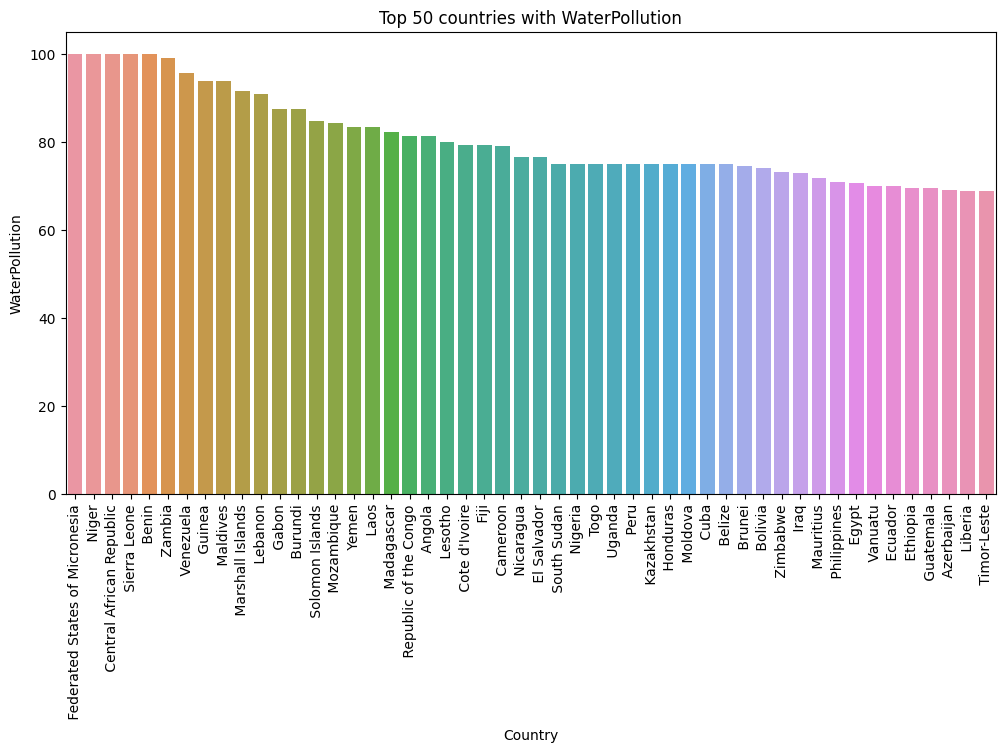

In [8]:
plt.figure(figsize=(12,6))
tmp_df = df.groupby("Country").agg({"WaterPollution":"median"}).sort_values("WaterPollution",ascending=False)[:50]
sns.barplot(x=tmp_df.index,y=tmp_df["WaterPollution"])
plt.xticks(rotation=90)
plt.title("Top 50 countries with WaterPollution")
plt.show()

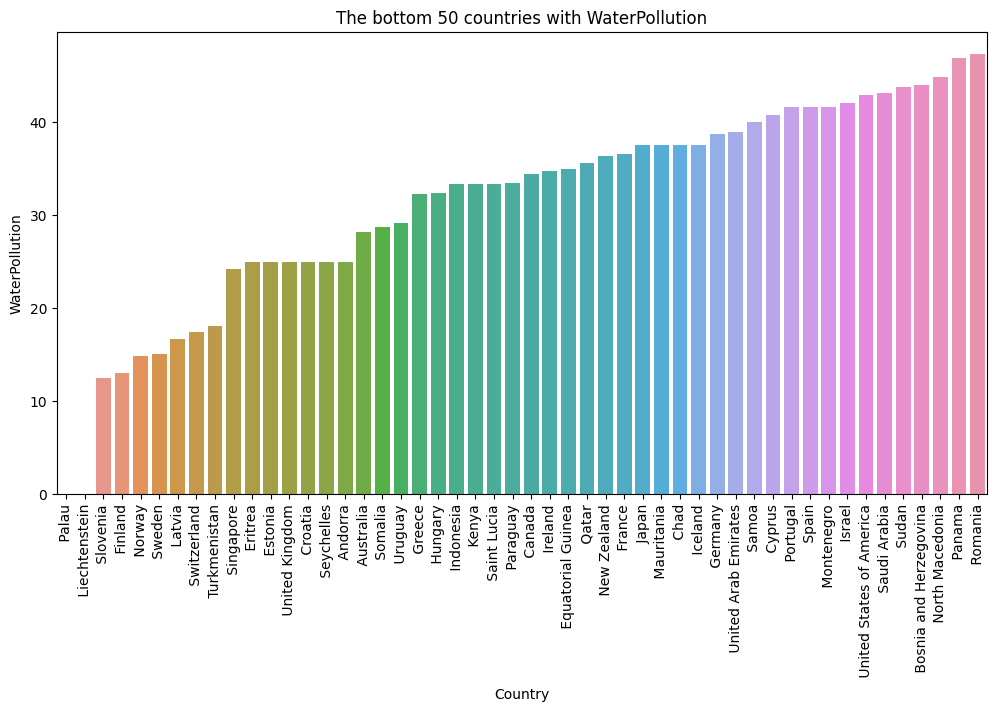

In [9]:
plt.figure(figsize=(12,6))
tmp_df = df.groupby("Country").agg({"WaterPollution":"median"}).sort_values("WaterPollution",ascending=True)[:50]
sns.barplot(x=tmp_df.index,y=tmp_df["WaterPollution"])
plt.xticks(rotation=90)
plt.title("The bottom 50 countries with WaterPollution")
plt.show()

### Water pollution had similar results to air pollution.

-0.45417262259393115


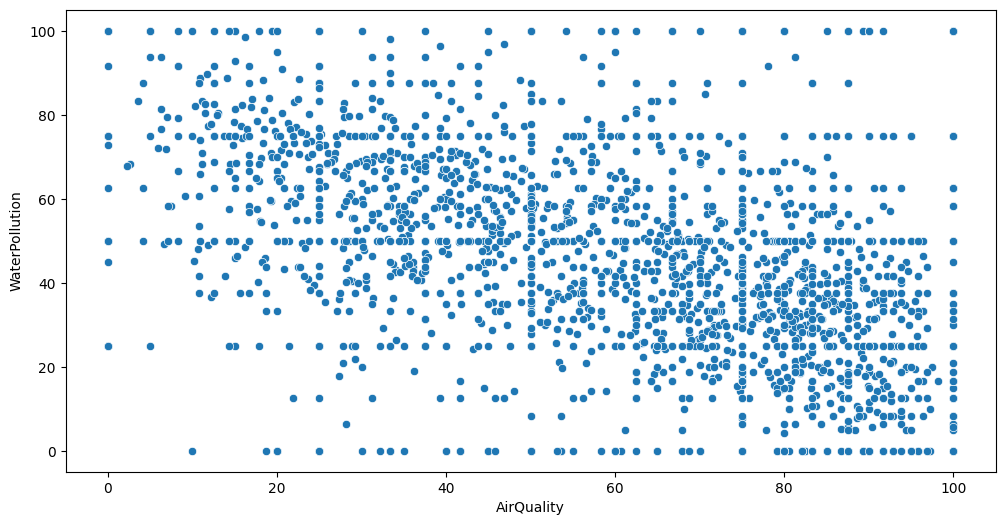

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["AirQuality"],y=df["WaterPollution"])
print(df["AirQuality"].corr(df["WaterPollution"]))
plt.show()

## Are there many multiples of 25?

In [11]:
print((df["AirQuality"]%25==0).sum()/len(df))
print((df["WaterPollution"]%25==0).sum()/len(df))

0.45092101942972496
0.5740600555134999


### Why is this?

# Conclusion
1. Countries with clean air and water are in Northern Europe, and countries with polluted air are in the Caribbean and the Middle East.
2. AirQuality and WaterPollution are often multiples of 25.